# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from pygments.lexers import q

print("Hello World!")

Hello World!


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/car_sales_data.csv")

In [4]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


Price Prediction

In [7]:
!pip install seaborn

In [9]:
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [13]:
print("shape ", df.shape)

print("\ncolumns ", df.columns.tolist())

print("\ninfo ")
print(df.info())

print("\nsummary statistics ")
print(df.describe())

shape  (50000, 7)

columns  ['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']

info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
None

summary statistics 
        Engine size  Year of manufacture        Mileage          Price
count  50000.000000         50000.000000   50000.000000   50000.000000
mean       1.773058          2004.209440  112497.320700   13828.903160
std      

In [12]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

Check for duplicates

In [14]:
print("Duplicates: ", df.duplicated().sum())

df = df.drop_duplicates()

Duplicates:  12


Inspect categorical columns

In [17]:
#see unique manufacturers
print("Manufacturers: ", df["Manufacturer"].nunique())
print(df["Manufacturer"].unique()[:10]) #show first 10

#see unique models
print("\nModels: ", df["Model"].nunique())

#see unique fuel types
print("\nFuel types: ", df["Fuel type"].unique())

Manufacturers:  5
['Ford' 'Porsche' 'Toyota' 'VW' 'BMW']

Models:  15

Fuel types:  ['Petrol' 'Diesel' 'Hybrid']


The above data tells us how diverse the dataset is. If dataset is too diverse then it's hard to encode

In [18]:
import datetime

current_year = datetime.datetime.now().year
#create new feature
df['Car Age'] = current_year - df["Year of manufacture"]

df[['Year of manufacture', "Car Age"]].head()

,Year of manufacture,Car Age
0,2002,23
1,2016,9
2,2014,11
3,1988,37
4,2006,19


Outlier detection

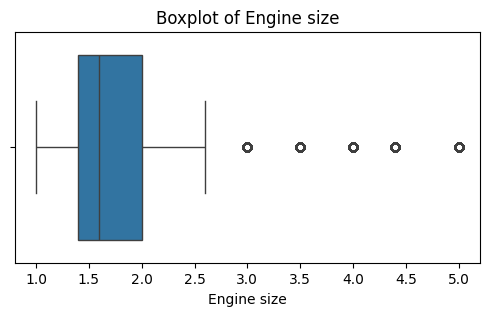

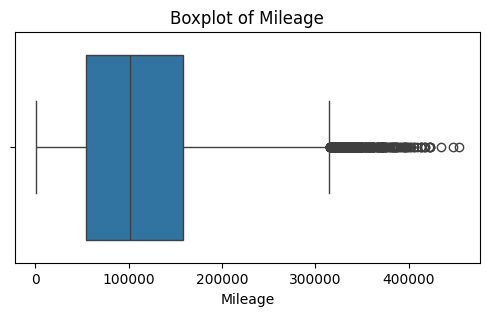

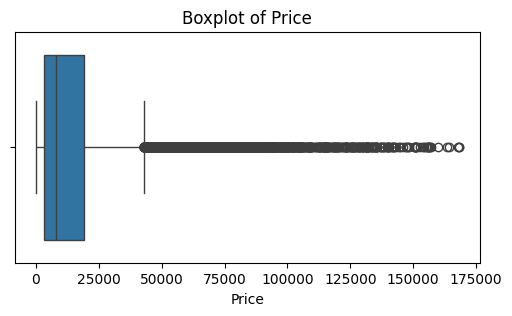

In [19]:
#boxplots for numeric columns
numeric_cols = ["Engine size", "Mileage", "Price"]
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

above plotting shows how the data is

Transform price & mileage

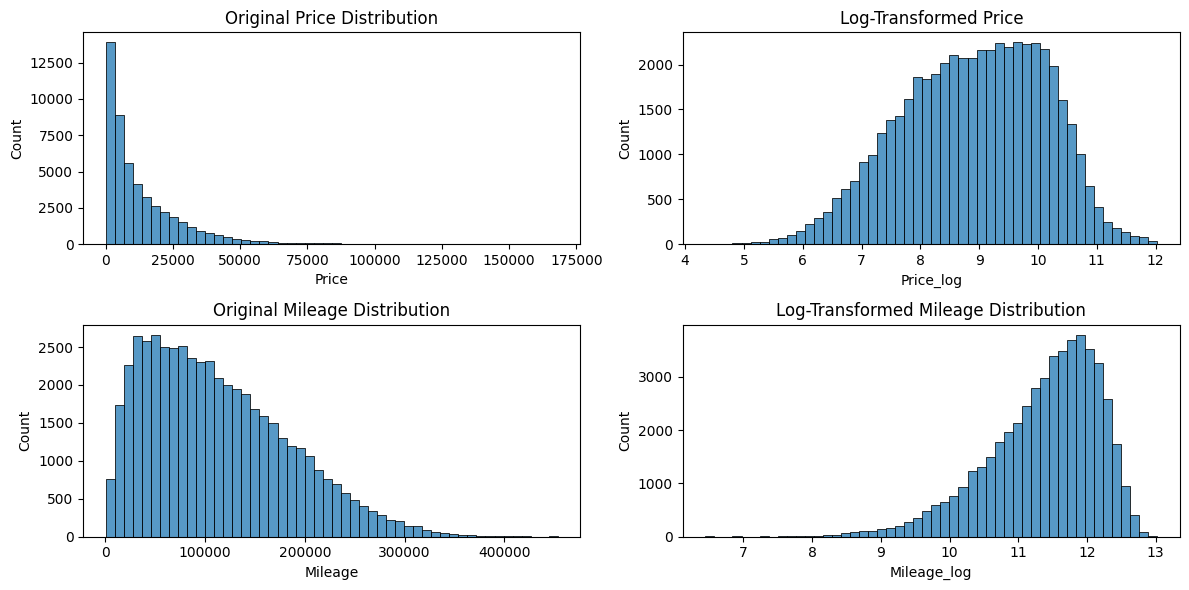

In [20]:
#apply log transform to skewed columns
df["Price_log"] = np.log1p(df["Price"])
df["Mileage_log"] = np.log1p(df["Mileage"])

#compare distributions before vs after
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.histplot(df["Price"], bins=50, ax=axes[0,0])
axes[0,0].set_title("Original Price Distribution")

sns.histplot(df["Price_log"], bins=50, ax=axes[0,1])
axes[0,1].set_title("Log-Transformed Price")

sns.histplot(df["Mileage"], bins=50, ax=axes[1,0])
axes[1,0].set_title("Original Mileage Distribution")

sns.histplot(df["Mileage_log"], bins=50, ax=axes[1,1])
axes[1,1].set_title("Log-Transformed Mileage Distribution")

plt.tight_layout()
plt.show()

Feature Preparation

In [23]:
print("Manufacturers: ", df['Manufacturer'].nunique())
print("Models: ", df['Model'].nunique())
print("Fuel Types: ", df["Fuel type"].nunique())

Manufacturers:  5
Models:  15
Fuel Types:  3


In [24]:
df_encoded = pd.get_dummies(df, columns=["Manufacturer", "Model", "Fuel type"], drop_first=True)

In [27]:
#define features

# Features: everything except price columns
X = df_encoded.drop(columns=["Price", "Price_log"])

# Target: log-transformed price
y = df_encoded["Price_log"]

Train Test split

In [30]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl (38.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (39990, 25)
Test shape: (9998, 25)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model performance on test set: ")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Model performance on test set: 
RMSE: 0.04
R² Score: 0.999


Extra: Looking at coefficients

In [34]:
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coeffs.head(10))
print(coeffs.head(10))

                 Feature  Coefficient
9              Model_911     0.580545
14              Model_M5     0.331376
0            Engine size     0.270032
19            Model_RAV4     0.187336
16          Model_Passat     0.147230
10         Model_Cayenne     0.135478
23      Fuel type_Hybrid     0.134468
6   Manufacturer_Porsche     0.125620
4            Mileage_log     0.114834
15          Model_Mondeo     0.075107
                 Feature  Coefficient
9              Model_911     0.580545
14              Model_M5     0.331376
0            Engine size     0.270032
19            Model_RAV4     0.187336
16          Model_Passat     0.147230
10         Model_Cayenne     0.135478
23      Fuel type_Hybrid     0.134468
6   Manufacturer_Porsche     0.125620
4            Mileage_log     0.114834
15          Model_Mondeo     0.075107


Why use log


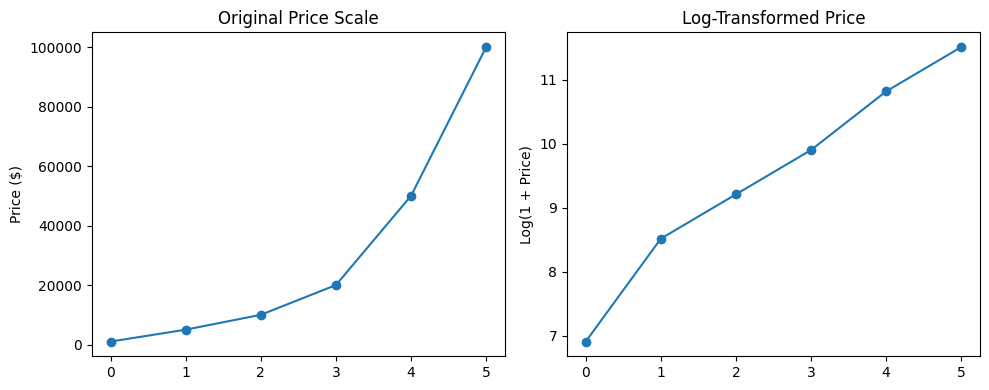

In [35]:
import numpy as np
import matplotlib.pyplot as plt

prices = np.array([1000, 5000, 10000, 20000, 50000, 100000])
prices_log = np.log1p(prices)

plt.figure(figsize=(10,4))

# Original
plt.subplot(1,2,1)
plt.plot(prices, 'o-')
plt.title("Original Price Scale")
plt.ylabel("Price ($)")

# Log-transformed
plt.subplot(1,2,2)
plt.plot(prices_log, 'o-')
plt.title("Log-Transformed Price")
plt.ylabel("Log(1 + Price)")

plt.tight_layout()
plt.show()


Convert Predictions to Dollar and Evaluate

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_dollars = np.expm1(y_pred)
y_test_dollars = np.expm1(y_test)

mse_dollars = mean_squared_error(y_test_dollars, y_pred_dollars)
rmse_dollars = np.sqrt(mse_dollars)
r2_dollars = r2_score(y_test_dollars, y_pred_dollars)

print("Model Performance on Original Dollar Scale: ")
print(f"RMSE: {rmse_dollars:.2f}")
print(f"R2 Score: {r2_dollars:.2f}")

Model Performance on Original Dollar Scale: 
RMSE: 1236.11
R2 Score: 0.99


Visualize Predictions vs Actual Prices

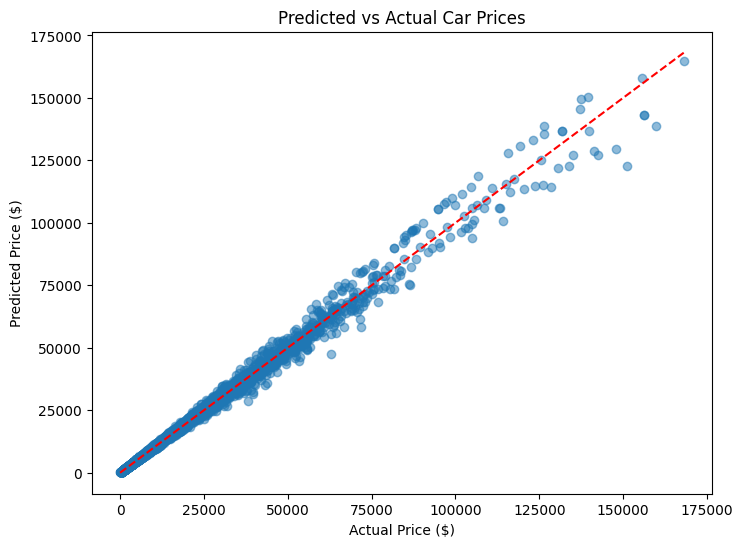

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_dollars, y_pred_dollars, alpha=0.5)
plt.plot([0, max(y_test_dollars)], [0, max(y_test_dollars)], color='red', linestyle='--')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Predicted vs Actual Car Prices")
plt.show()


Project 2 - Exploratory Data Analysis

This project is less about prediction and more about finding patterns in data

For this project we will find

1. Which manufacturer tends to have the most expensive cars?
2. How does mileage affect price across different fuel types?
3. What is the distribution of car ages?
4. Which features correlate most with price?